In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree,naive_bayes
import xgboost
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [2]:
#loading a dataset
Titanic=pd.read_csv("datasets_11657_16098_train.csv")

In [3]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#keys values of the dataset
Titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#converting the Categorical Features into num feature
from sklearn.preprocessing import LabelEncoder
convert=LabelEncoder()

In [6]:
Titanic_df = Titanic.select_dtypes(include = ['int64','float64'])

In [7]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [8]:
Titanic_df.isnull().any()
Titanic_df = Titanic_df.fillna(method='ffill')

In [9]:
Titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool

In [10]:
x= Titanic_df.drop(['Survived'],axis=1)

In [11]:
y = Titanic_df['Survived']

In [12]:
def feature_select(model,x,y,m):
    model.fit(x,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    fea_import = pd.Series(model.feature_importances_, index=x.columns)
    fea_import.nlargest(m).plot(kind='barh')# for visualization . 
    plt.show()

[0.27129883 0.10478906 0.25270012 0.04842414 0.05075416 0.27203369]


C:\Users\aarti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


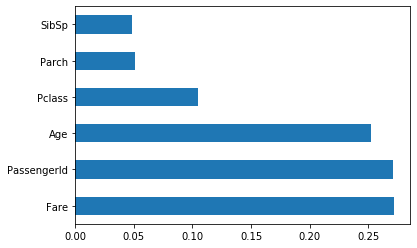

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
feature_select(model,x,y,8)

In [14]:
X = x.filter(['PassengerId','Fare','Age','Pclass','SibSp','Parch'],axis=1)
print(X.head())

   PassengerId     Fare   Age  Pclass  SibSp  Parch
0            1   7.2500  22.0       3      1      0
1            2  71.2833  38.0       1      1      0
2            3   7.9250  26.0       3      0      0
3            4  53.1000  35.0       1      1      0
4            5   8.0500  35.0       3      0      0


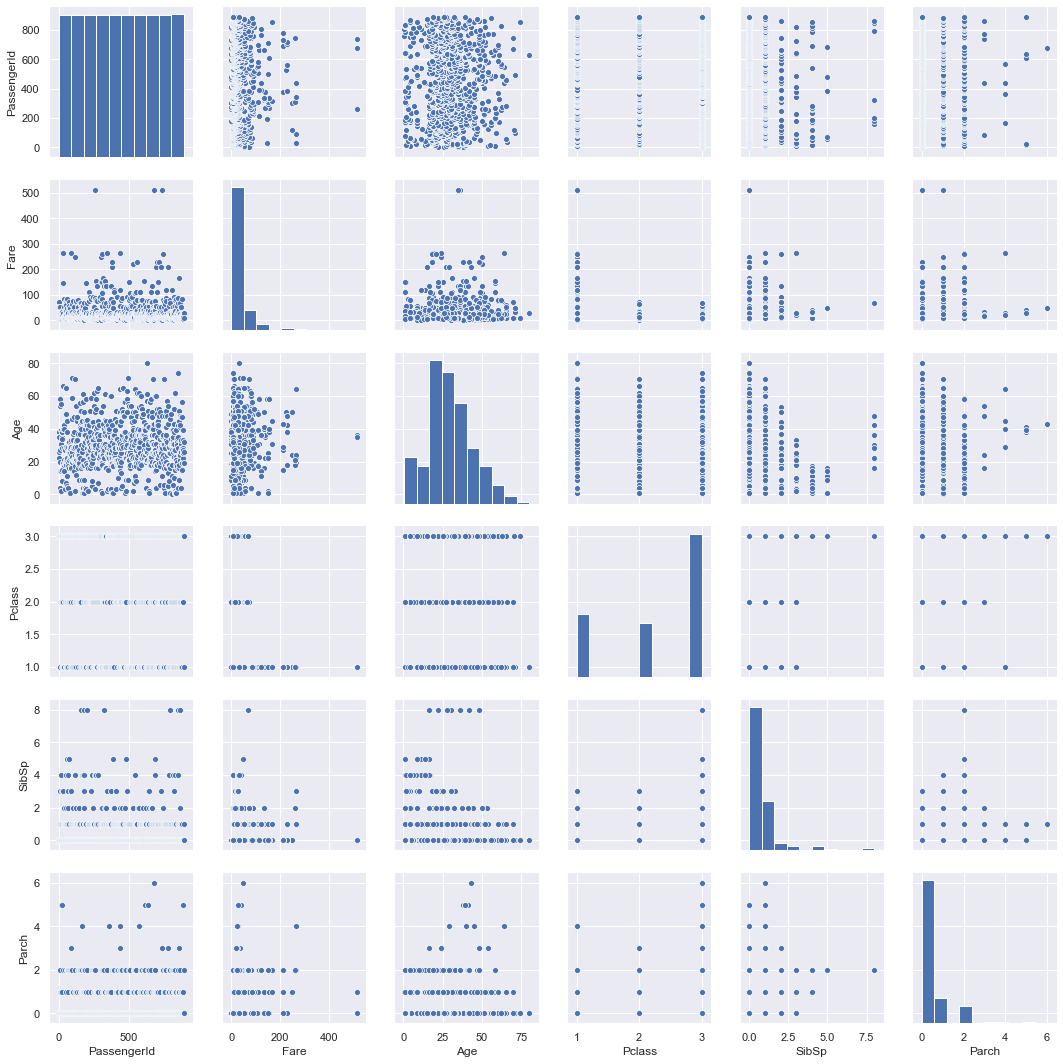

In [15]:
import seaborn as sns
sns.set()
sns.pairplot(X, height = 2.5)
plt.show()

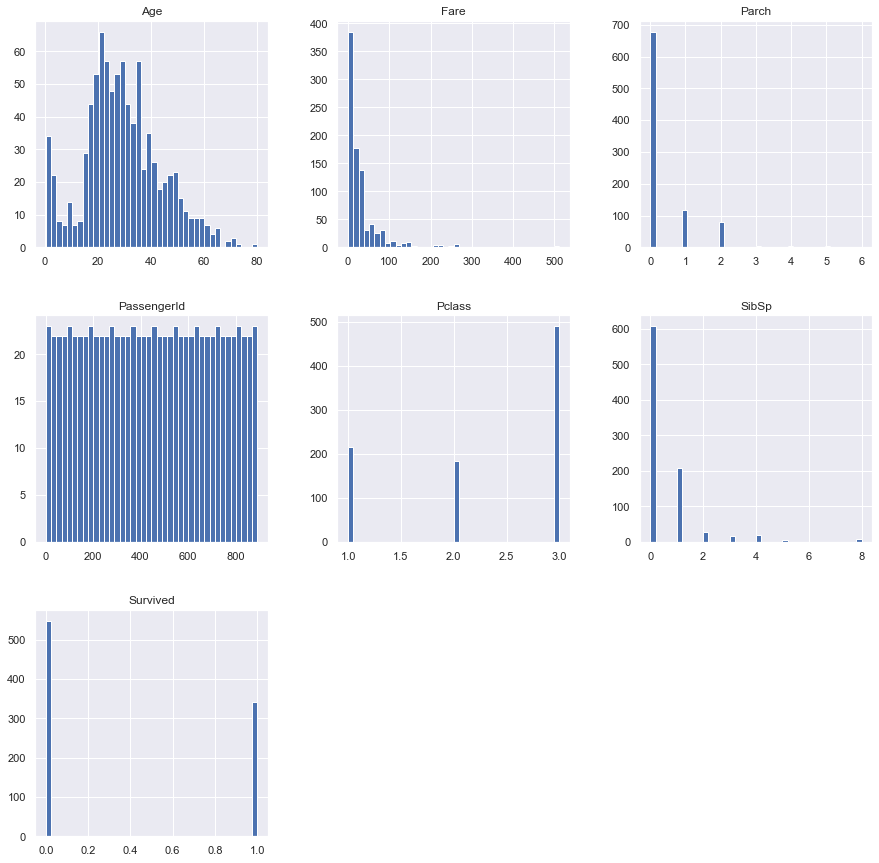

In [16]:
Titanic_df.hist(bins=40,figsize=(15,15))
plt.show()

In [17]:
#descriptive statistics summary
print(Titanic_df['Survived'].describe())

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [18]:
# Checked weather Data is balanced or not
print(Titanic_df.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print("Number of observations in each class after oversampling (training data): \n", pd.Series(y_train).value_counts())

Number of observations in each class after oversampling (training data): 
 1    438
0    438
dtype: int64


In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)# Train Decision Tree Classifer
y_pred = clf.predict(X_test) #Predict the response for test dataset

Confusion Matrix 
 [[77 34]
 [35 33]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       111
           1       0.49      0.49      0.49        68

    accuracy                           0.61       179
   macro avg       0.59      0.59      0.59       179
weighted avg       0.61      0.61      0.61       179



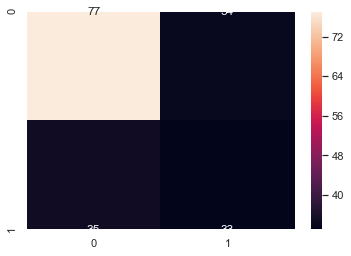

In [22]:
Clf = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n',cm)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier  on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy: 0.6145251396648045
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree Classifier  on test set: 0.62


C:\Users\aarti\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


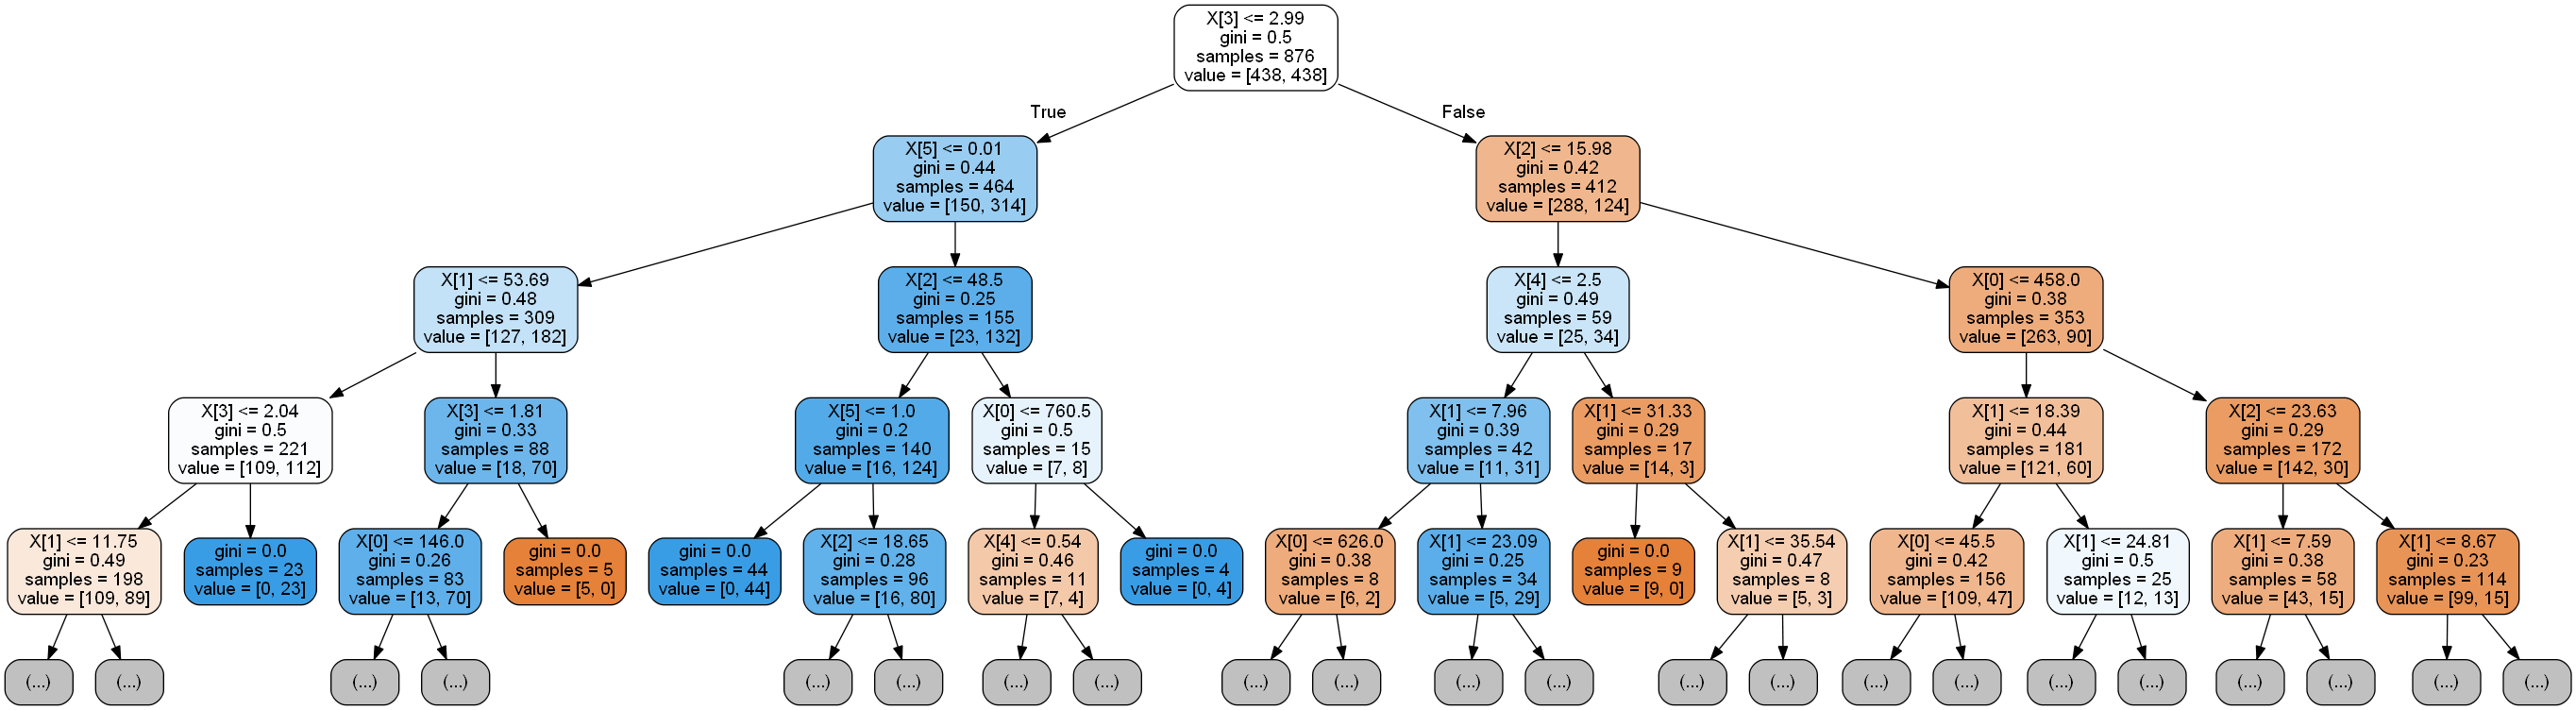

In [24]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded = True, proportion = False, 
                precision = 2,max_depth=4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=5000, height=5000)